# Congress - Who/What
Ideas:
- Policy Areas - Count; By Party Sponsor
- Congressman -  Policy Focus Area, Political Score, Engagement Score (i.e. Page Rank)
- Create heat map of policies 

Data Needs:
- Pull voting records for 115th Congress
- 

In [266]:
from urllib.request import urlopen
import bs4
import requests
from lxml import html
from lxml.cssselect import CSSSelector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## CONGRESSIONAL BILL SCRAPE
- By Policy Area
- By Primary Sponsor
- By Party
- By State

In [95]:
xml_range = range(1,100)
sponsor = []
policyarea = []
party = []
state = []

In [96]:
for i in xml_range:
    url = 'https://www.govinfo.gov/bulkdata/BILLSTATUS/115/hr/BILLSTATUS-115hr' + str(i) + '.xml'
    source = requests.get(url)
    ntree = html.document_fromstring(source.content)
    policyarea_text = ntree.xpath('//bill/policyarea/name/text()')
    policyarea.append(policyarea_text)
    sponsor_text = ntree.xpath('//bill/sponsors/item/fullname/text()')
    sponsor.append(sponsor_text)
    party_text = ntree.xpath('//bill/sponsors/item/party/text()')
    party.append(party_text)
    state_text = ntree.xpath('//bill/sponsors/item/state/text()')
    state.append(state_text)

In [216]:
billdf = pd.DataFrame({'policyarea':policyarea, 'sponsor':sponsor, 'party':party, 'state':state})

billdf['policyarea'] = billdf['policyarea'].astype(str)
billdf['policyarea'] = billdf['policyarea'].str.replace('[','')
billdf['policyarea'] = billdf['policyarea'].str.replace(']','')
billdf['policyarea'] = billdf['policyarea'].str.replace("'","")

billdf['sponsor'] = billdf['sponsor'].astype(str)
billdf['sponsor'] = billdf['sponsor'].str.replace('[','')
billdf['sponsor'] = billdf['sponsor'].str.replace(']','')
billdf['sponsor'] = billdf['sponsor'].str.replace("'","")

billdf['party'] = billdf['party'].astype(str)
billdf['party'] = billdf['party'].str.replace('[','')
billdf['party'] = billdf['party'].str.replace(']','')
billdf['party'] = billdf['party'].str.replace("'","")

billdf['state'] = billdf['state'].astype(str)
billdf['state'] = billdf['state'].str.replace('[','')
billdf['state'] = billdf['state'].str.replace(']','')
billdf['state'] = billdf['state'].str.replace("'","")

In [217]:
billdf = billdf.replace('', np.nan)
billdf = billdf.dropna(thresh=2)

In [366]:
newcol_dem = billdf.party
newcol_rep = billdf.party
billdf = billdf.assign(dem=newcol_dem, rep=newcol_rep)

In [367]:
billdf.dem = np.where(billdf.dem == 'D', 1, 0)
billdf.rep = np.where(billdf.rep == 'R', 1, 0)

In [374]:
newcol_total = billdf.dem + billdf.rep
billdf = billdf.assign(total=newcol_total)

In [375]:
billdf.head()

,party,policyarea,sponsor,state,dem,rep,total
0,R,Taxation,"Rep. Brady, Kevin R-TX-8",TX,0,1,1
1,R,Agriculture and Food,"Rep. Conaway, K. Michael R-TX-11",TX,0,1,1
3,R,Transportation and Public Works,"Rep. Shuster, Bill R-PA-9",PA,0,1,1
4,R,Government Operations and Politics,"Rep. Goodlatte, Bob R-VA-6",VA,0,1,1
6,R,"Civil Rights and Liberties, Minority Issues","Rep. Smith, Christopher H. R-NJ-4",NJ,0,1,1


In [423]:
billdf_by_policy = billdf.groupby('policyarea')[['party','dem', 'rep']].sum()

In [424]:
newcol_total = billdf_by_policy.dem + billdf_by_policy.rep
billdf_by_policy = billdf_by_policy.assign(total=newcol_total)
billdf_by_policy = billdf_by_policy.reset_index(level=['policyarea'])
billdf_by_policy = billdf_by_policy.sort_values(by='total', ascending=False)

In [425]:
billdf_by_policy.head()

,policyarea,dem,rep,total
11,Government Operations and Politics,3,17,20
5,Crime and Law Enforcement,8,5,13
1,Armed Forces and National Security,6,4,10
19,Taxation,1,6,7
13,Immigration,0,4,4


## Data Visualization

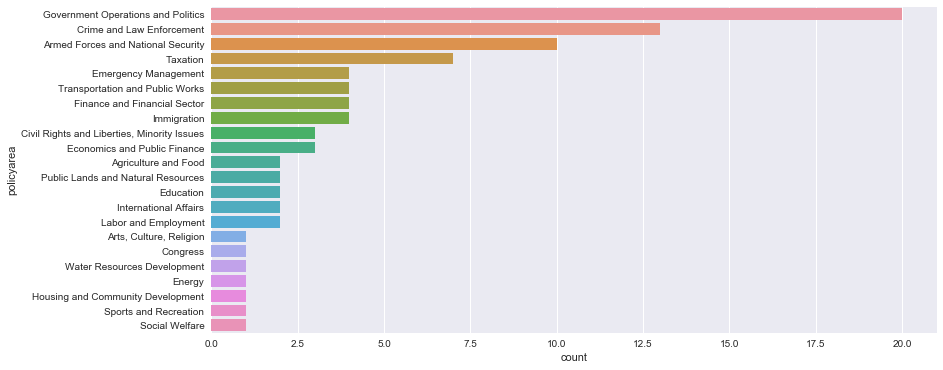

In [311]:
sns.set(rc={'figure.figsize':(13,6)})
sns.countplot(y = 'policyarea', data = billdf, order = billdf['policyarea'].value_counts().
              index, label = 'big')

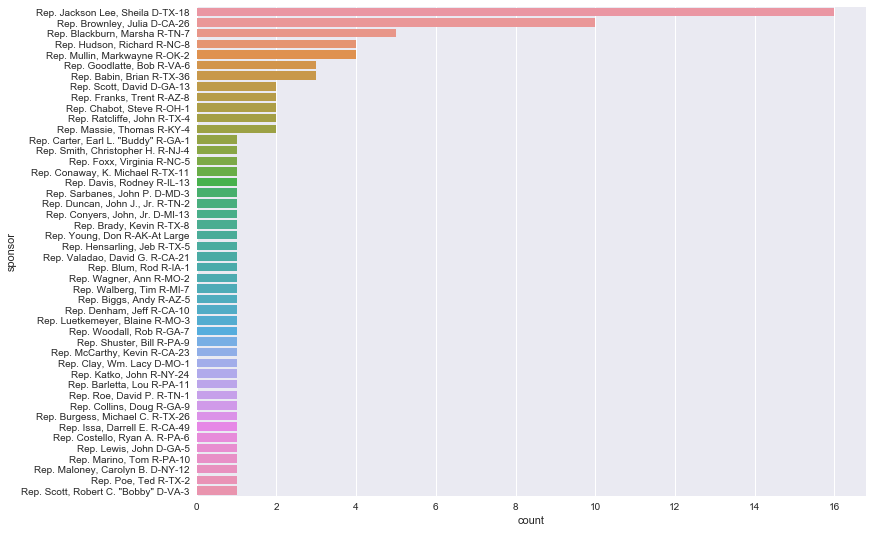

In [237]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(y = "sponsor", data = billdf, order = billdf['sponsor'].value_counts().index, label = 'big')

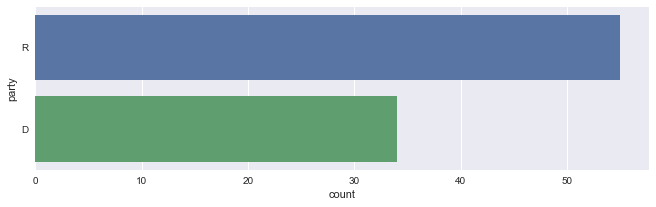

In [238]:
sns.set(rc={'figure.figsize':(11,3)})
sns.countplot(y = "party", data = billdf, order = billdf['party'].value_counts().index, label = 'big')

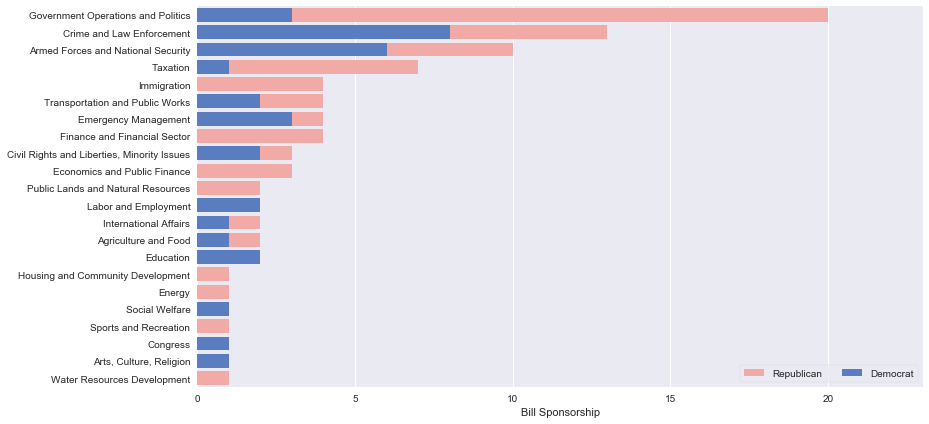

In [436]:
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="policyarea", data=billdf_by_policy, label="Republican", color="r")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="dem", y="policyarea", data=billdf_by_policy, label="Democrat", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 23), ylabel="", xlabel="Bill Sponsorship")
sns.despine(left=True, bottom=True)

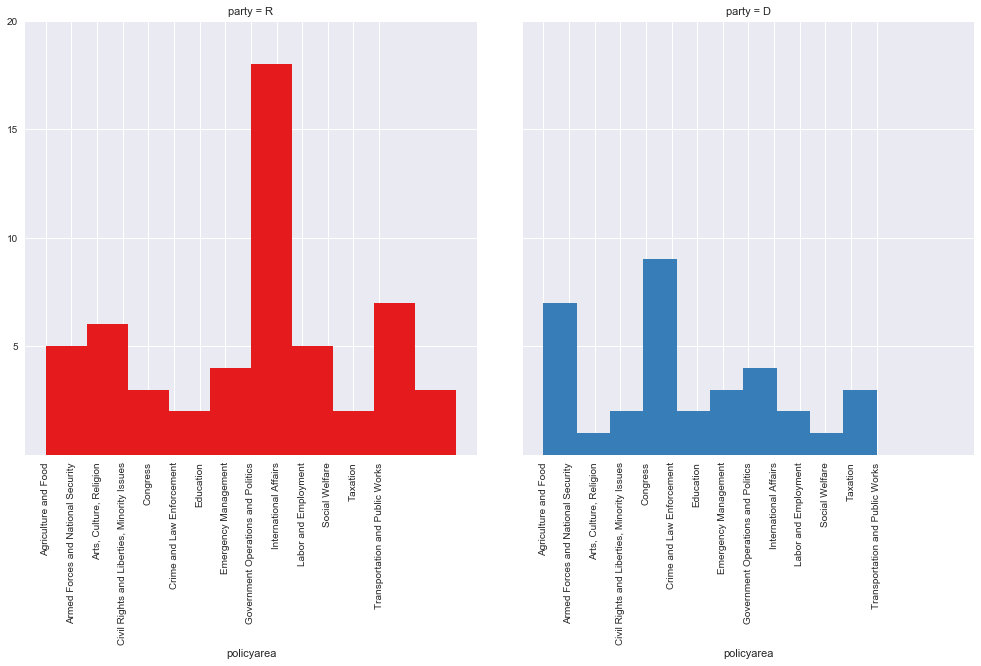

In [510]:
g = sns.FacetGrid(billdf, col='party', size=7, aspect=1, hue='party', palette='Set1')
g = (g.map(plt.hist, 'policyarea').set(ylim=(0, 20), yticks=[5, 10, 15, 20]))
g = g.set_xticklabels(rotation=90)

## Plotly Graph

In [516]:
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('stangur', 'uJC3nf2YPJNFdQLGDyHK')

In [518]:
data = Data([
    Choropleth(
        z=[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 8.0, 8.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 16.0, 18.0, 20.0, 20.0, 29.0, 29.0, 38.0, 55.0],
        autocolorscale=False,
        colorbar=ColorBar(
            title='Votes'
        ),
        colorscale=[[0.0, 'rgb(242,240,247)'], [0.2, 'rgb(218,218,235)'], [0.4, 'rgb(188,189,220)'], [0.6, 'rgb(158,154,200)'], [0.8, 'rgb(117,107,177)'], [1.0, 'rgb(84,39,143)']],
        hoverinfo='location+z',
        locationmode='USA-states',
        locations=['DE', 'VT', 'ND', 'SD', 'MT', 'WY', 'AK', 'DC', 'NH', 'RI', 'ME', 'ID', 'HI', 'WV', 'NE', 'NM', 'MS', 'AR', 'IA', 'KS', 'NV', 'UT', 'CT', 'OR', 'OK', 'KY', 'LA', 'SC', 'AL', 'CO', 'MD', 'MO', 'WI', 'MN', 'MA', 'TN', 'IN', 'AZ', 'WA', 'VA', 'NJ', 'NC', 'GA', 'MI', 'OH', 'PA', 'IL', 'NY', 'FL', 'TX', 'CA'],
        marker=Marker(
            line=Line(
                color='rgb(255,255,255)',
                width=2
            )
        ),
        text=['DE', 'VT', 'ND', 'SD', 'MT', 'WY', 'AK', 'DC', 'NH', 'RI', 'ME', 'ID', 'HI', 'WV', 'NE', 'NM', 'MS', 'AR', 'IA', 'KS', 'NV', 'UT', 'CT', 'OR', 'OK', 'KY', 'LA', 'SC', 'AL', 'CO', 'MD', 'MO', 'WI', 'MN', 'MA', 'TN', 'IN', 'AZ', 'WA', 'VA', 'NJ', 'NC', 'GA', 'MI', 'OH', 'PA', 'IL', 'NY', 'FL', 'TX', 'CA']
    )
])

In [519]:
layout = Layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showlakes=True
    ),
    title='2016 Electoral College Votes'
)

In [520]:
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~stangur/0 or inside your plot.ly account where it is named 'plot from API'
